In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
walmart=pd.read_csv('/content/drive/MyDrive/DSAI/Walmart.csv')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [84]:
walmart.copy=walmart.copy()

In [85]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [86]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [87]:
walmart.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [88]:
walmart.duplicated().sum()

0

In [89]:
features = [i for i in walmart.columns ]
categorical_features = []
numerical_features = []
threshold = 100

for feature in features:
    if walmart[feature].nunique() <= threshold:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print("The Dataset has {} numerical & {} categorical features.".format(len(categorical_features),len(numerical_features)))
print("Numerical features are {}".format(numerical_features))
print("Categorical features are {}".format(categorical_features))

The Dataset has 2 numerical & 6 categorical features.
Numerical features are ['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Categorical features are ['Store', 'Holiday_Flag']


In [90]:
data = walmart.loc[:, ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]


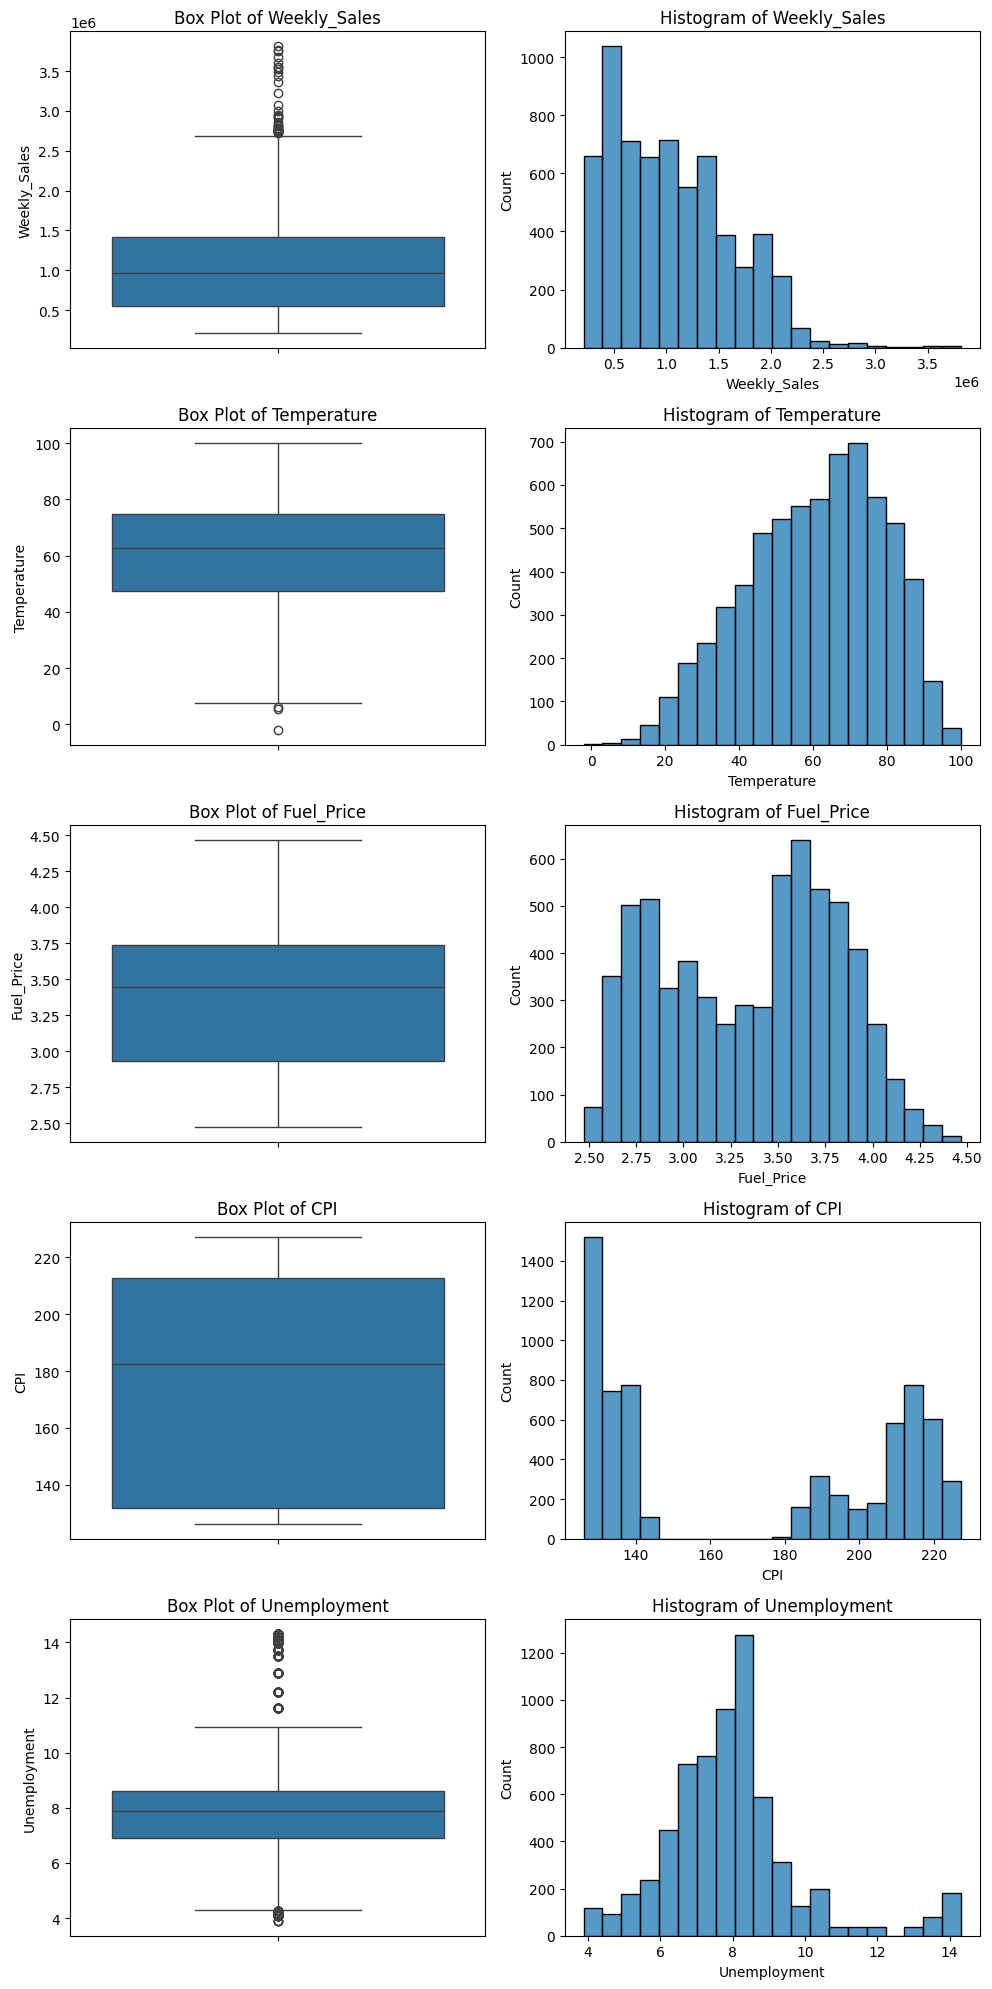

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

axes = axes.flatten()

numeric_columns = [col for col in data.columns if walmart[col].dtype != 'object'][:5]

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data[col], ax=axes[i*2])
    axes[i*2].set_title(f"Box Plot of {col}")

    sns.histplot(data[col], bins=20, ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()


In [92]:
data_cat = walmart.loc[:, ['Store', 'Holiday_Flag']]

In [93]:
for i in data_cat.columns:
  print(data_cat[i].value_counts(),'***')

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64 ***
Holiday_Flag
0    5985
1     450
Name: count, dtype: int64 ***


In [94]:
!pip install ydata-profiling



In [95]:
from ydata_profiling import ProfileReport


In [96]:
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()
profile.to_file("Walmart_profile_report.html")

Output hidden; open in https://colab.research.google.com to view.

In [97]:
walmart['Date'] = pd.to_datetime(walmart['Date'], format='mixed', dayfirst=True, errors='coerce')


In [98]:
walmart['Year']=walmart['Date'].dt.year
walmart['Quarter']=walmart['Date'].dt.quarter
walmart['Month']=walmart['Date'].dt.month
walmart['Week'] = walmart['Date'].dt.isocalendar().week


1.Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas

In [99]:
walmart.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,3,9


In [100]:
walmart.drop('Date',axis=1,inplace=True)

In [101]:

walmart.corr()['Weekly_Sales']

,Weekly_Sales
Store,-0.335332
Weekly_Sales,1.000000
Holiday_Flag,0.036891
Temperature,-0.063810
Fuel_Price,0.009464
CPI,-0.072634
Unemployment,-0.106176
Year,-0.018378
Quarter,0.063363
Month,0.076143


In [102]:
data_series=walmart.groupby(['Year','Quarter'])['Weekly_Sales'].sum().reset_index()

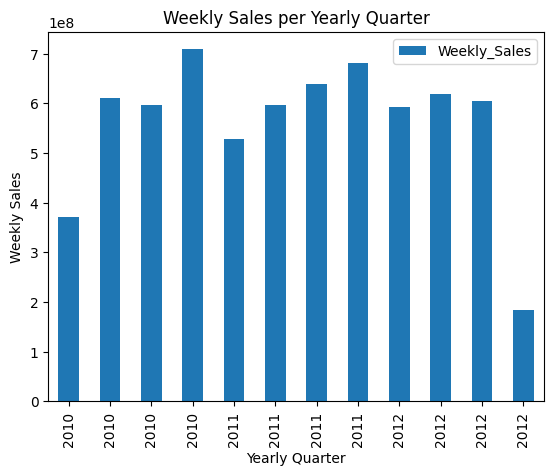

In [103]:
data_series.plot(x='Year', y='Weekly_Sales', kind='bar')

plt.title('Weekly Sales per Yearly Quarter')
plt.xlabel('Yearly Quarter')
plt.ylabel('Weekly Sales')
plt.show()

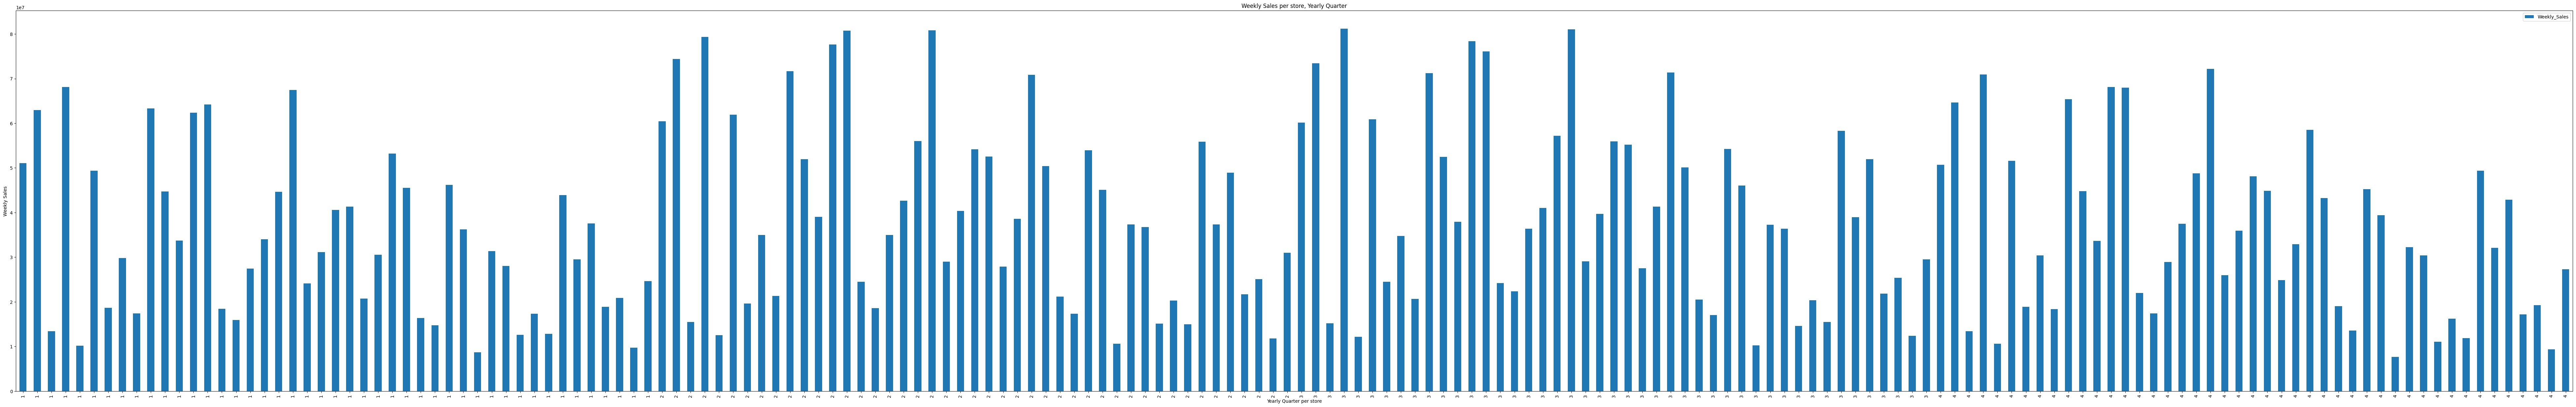

In [104]:
data_series_store=walmart.groupby(['Quarter','Store'])['Weekly_Sales'].sum().reset_index()
data_series_store.plot(x='Quarter', y='Weekly_Sales', kind='bar',figsize=(100, 15))

plt.title('Weekly Sales per store, Yearly Quarter')
plt.xlabel('Yearly Quarter per store')
plt.ylabel('Weekly Sales')
plt.show()

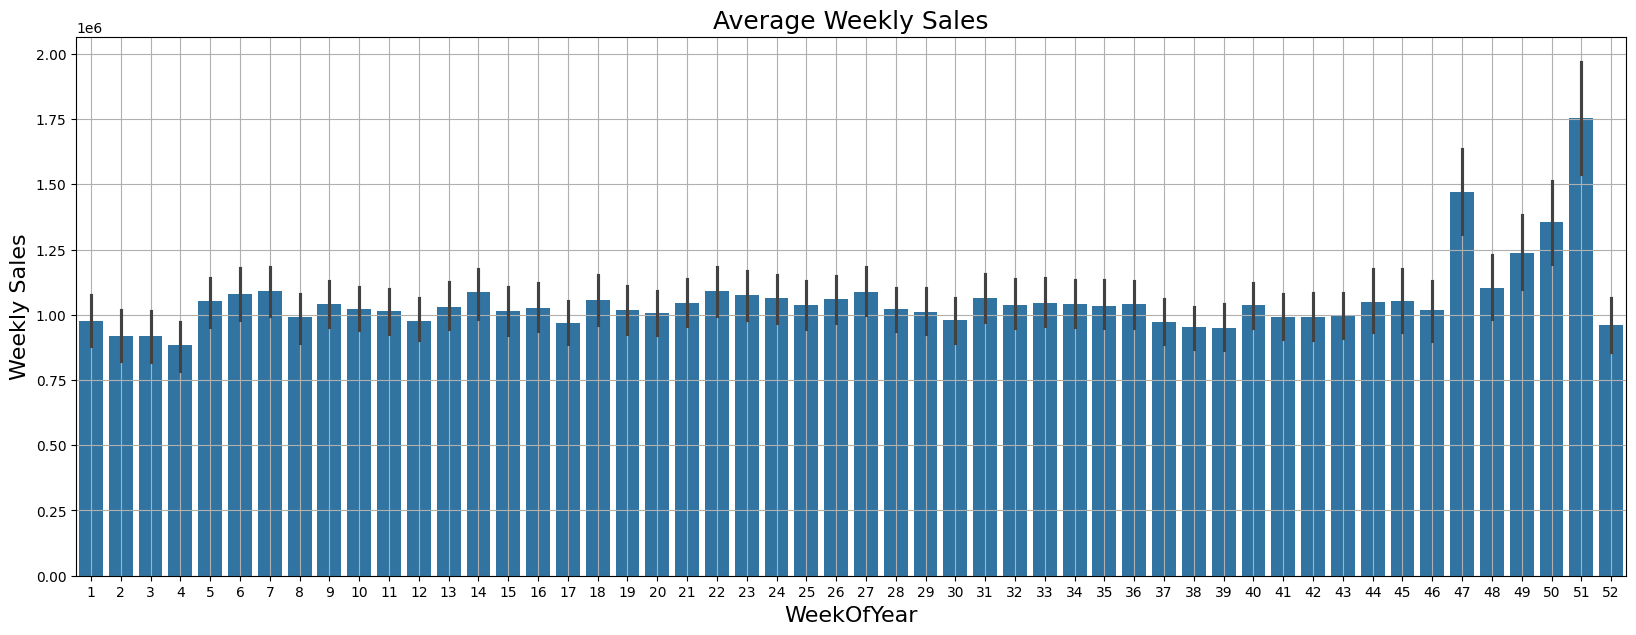

In [105]:
plt.figure(figsize = (20, 7))
sns.barplot(x='Week',y='Weekly_Sales',data=walmart)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('WeekOfYear', fontsize=16)
plt.grid()
plt.show()

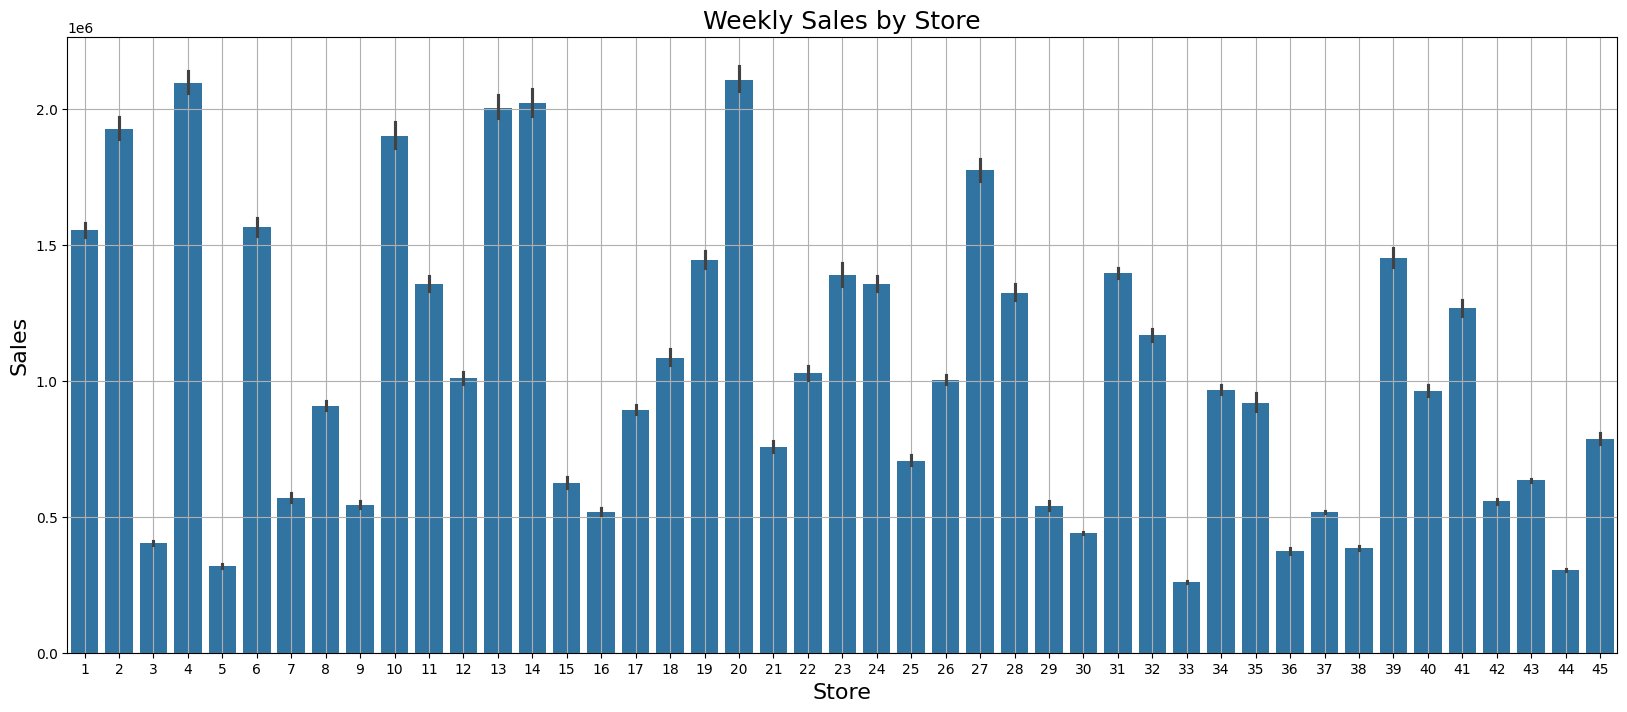

In [106]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Weekly_Sales',data=walmart)
plt.title('Weekly Sales by Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.grid()
plt.show()

In [107]:
palette = ["#fc8d62", "#ffd92f", "#e5c494", "#b3b3b3", "#66c2a5", "#96b9d0", "#8da0cb", "#ce94bc", "#eba7ac", "#f5ae52"]

<ipython-input-108-6786fa3c71b3>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


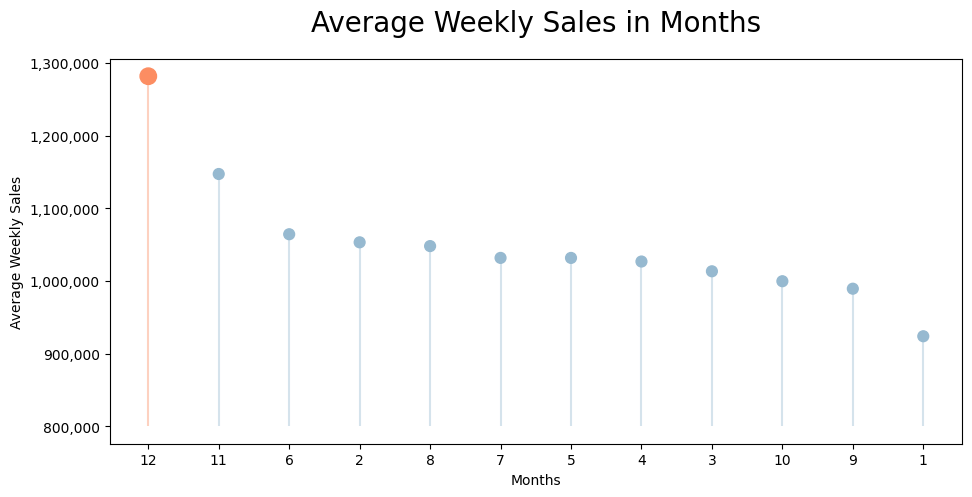

In [108]:
temp_data = walmart.groupby('Month').mean().sort_values(by='Weekly_Sales', ascending=False)
temp_data['Month'] = temp_data.index.astype(str)
temp_data = temp_data.reset_index(drop=True)

# Create a color if the Sales is Max
my_color=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), palette[0], palette[5])
my_size=np.where(temp_data['Weekly_Sales']==temp_data['Weekly_Sales'].max(), 140, 60)

# The horizontal plot is made using the vline() function
fig, ax = plt.subplots(figsize=(11,5))
plt.vlines(x=temp_data['Month'], ymin=800000, ymax=temp_data['Weekly_Sales'], color=my_color, alpha=0.4)
plt.scatter(temp_data['Month'], temp_data['Weekly_Sales'], color=my_color, s=my_size, alpha=1)

# Add title and axis names
plt.title("Average Weekly Sales in Months", fontsize=20, y=1.05)
plt.xlabel('Months')
plt.ylabel('Average Weekly Sales')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# show the graph
plt.show()

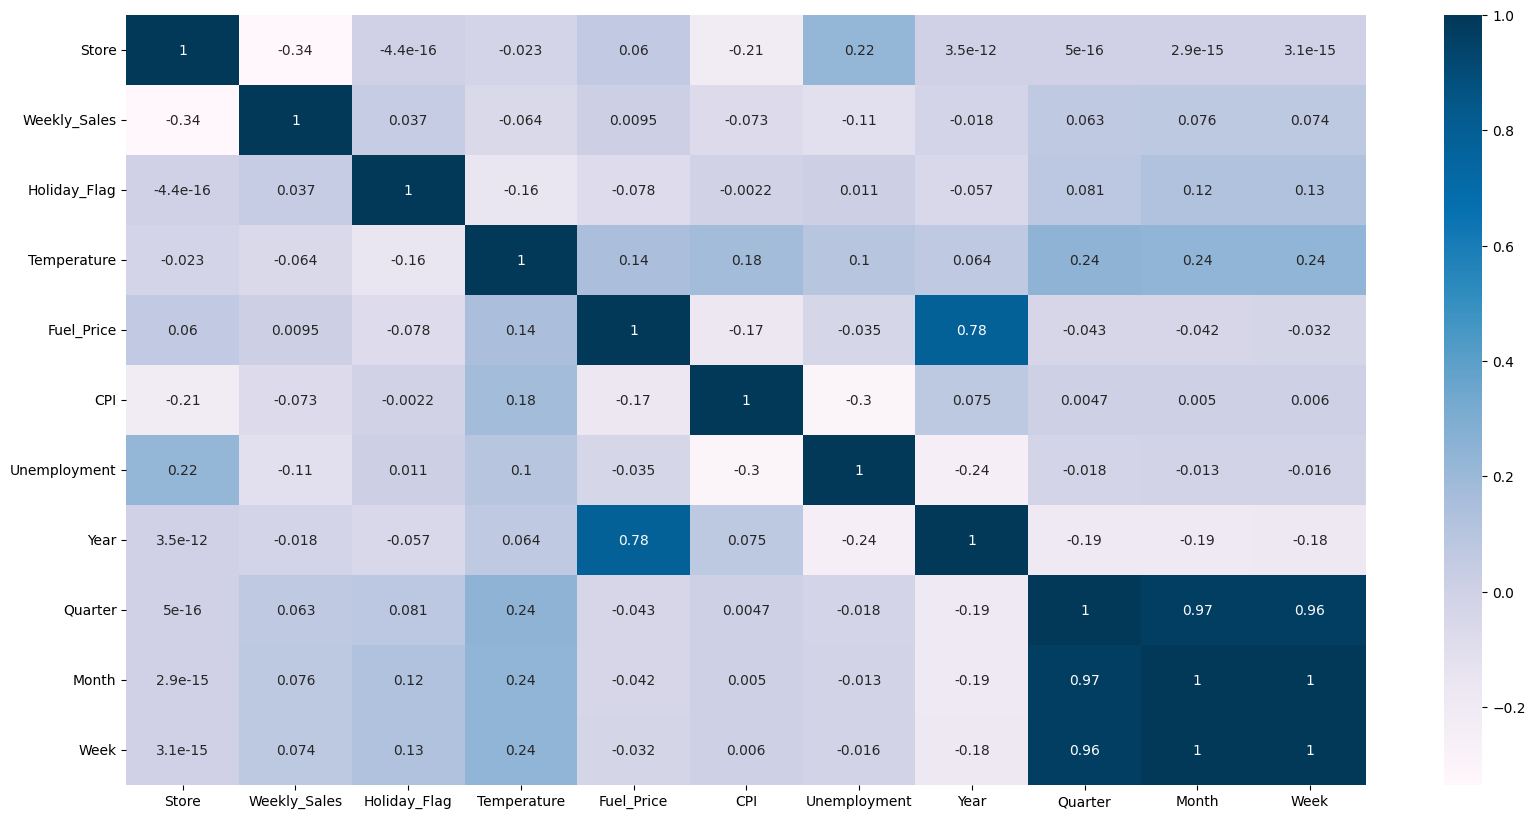

In [109]:
plt.figure(figsize = (20,10))
sns.heatmap(walmart.corr(), cmap = 'PuBu', annot = True)
plt.show()

**Model Building Part**

In [110]:
walmart.copy.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [111]:
from scipy import stats
walmart.copy['zscore'] = stats.zscore(walmart.copy['Weekly_Sales'])
outliers = walmart.copy[(walmart.copy['zscore'] > 3) | (walmart.copy['zscore'] < -3)]

In [112]:
outliers.min()

,0
Store,2
Date,10/12/2010
Weekly_Sales,2740057.14
Holiday_Flag,0
Temperature,24.07
Fuel_Price,2.752
CPI,126.669267
Unemployment,5.143
zscore,3.00022


In [113]:
outliers.max()

,0
Store,27
Date,26-11-2010
Weekly_Sales,3818686.45
Holiday_Flag,1
Temperature,60.68
Fuel_Price,3.76
CPI,218.99955
Unemployment,9.003
zscore,4.911589


In [114]:
Q1 = walmart.copy["Unemployment"].quantile(0.25)
Q3 = walmart.copy["Unemployment"].quantile(0.75)
IQR  = Q3-Q1

In [115]:
outlier_lower_bound = walmart.copy[(walmart.copy["Unemployment"] < (Q1-(1.5*IQR)))]
outlier_upper_bound = walmart.copy[(walmart.copy["Unemployment"] > (Q3+(1.5*IQR)))]

In [116]:
walmart.copy = walmart.copy.drop(outlier_lower_bound.index)
walmart.copy = walmart.copy.drop(outlier_upper_bound.index)

<Axes: ylabel='Unemployment'>

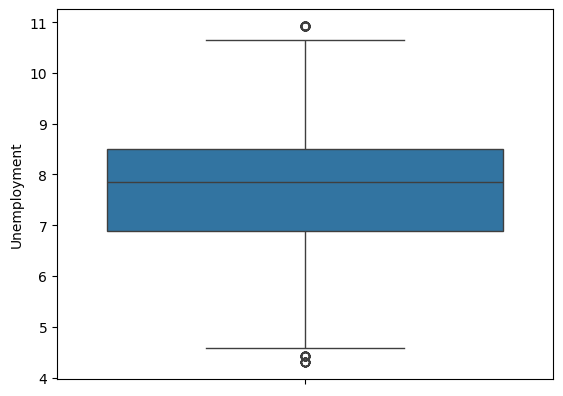

In [117]:
sns.boxplot(walmart.copy['Unemployment'])

In [118]:
walmart.copy.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,zscore
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.057420
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.054348
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.001206
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,0.642828
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106,0.899914


In [119]:
walmart.copy['Date']=pd.to_datetime(walmart.copy['Date'],format='mixed', dayfirst=True, errors='coerce')
walmart.copy["Day"] = walmart.copy["Date"].dt.day # Extract day of month
walmart.copy["Month"] = walmart.copy["Date"].dt.month # Extract month
walmart.copy["Year"]  = walmart.copy["Date"].dt.year # Extract year
walmart.copy["WeekOfYear"] = walmart.copy["Date"].dt.isocalendar().week # Extract week of year

walmart.copy.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,zscore,Day,Month,Year,WeekOfYear
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.057420,5,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1.054348,12,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.001206,19,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0.642828,26,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0.899914,5,3,2010,9


In [120]:
df_stores =walmart.copy.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [121]:
df_stores.set_index('Date',inplace=True)

In [122]:
from statsmodels.tsa.stattools import adfuller # importing the adfuller for check the data stationarity

# check for stationarity
def adf_test(series, title=''):

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val


    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [123]:
adf_test(df_stores['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -5.680542e+00
p-value                 8.506391e-07
# lags used             4.000000e+00
# observations          1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_stores['Weekly_Sales'],period=13)

Figure(640x480)


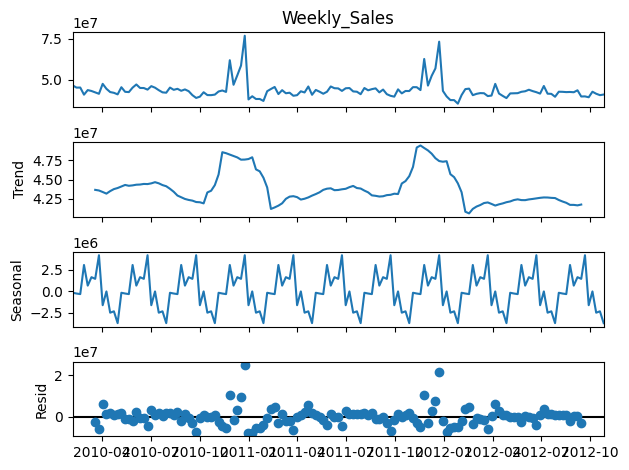

In [125]:
print(decomposition.plot())# Plotting the components of the data

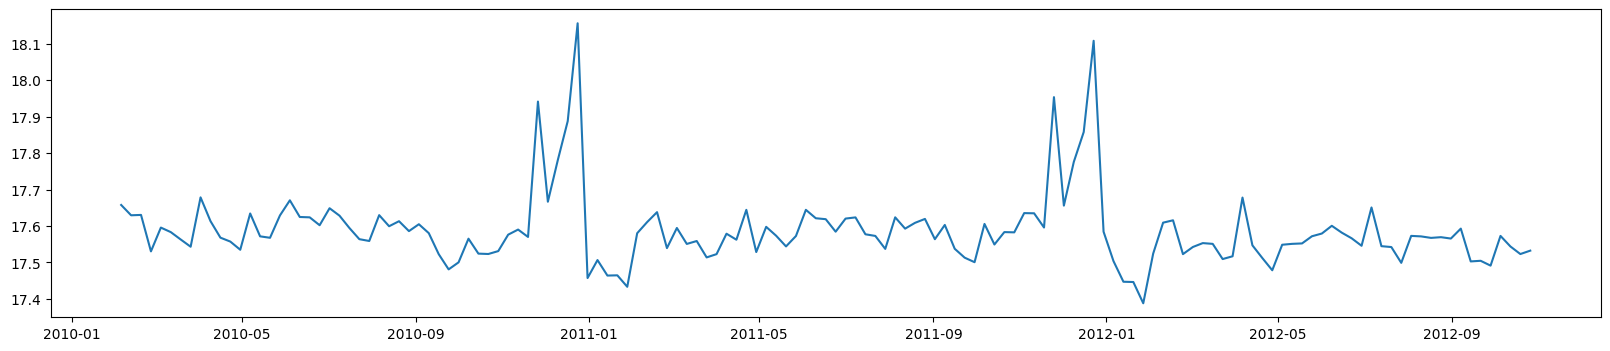

In [126]:
df_log = np.log(df_stores)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

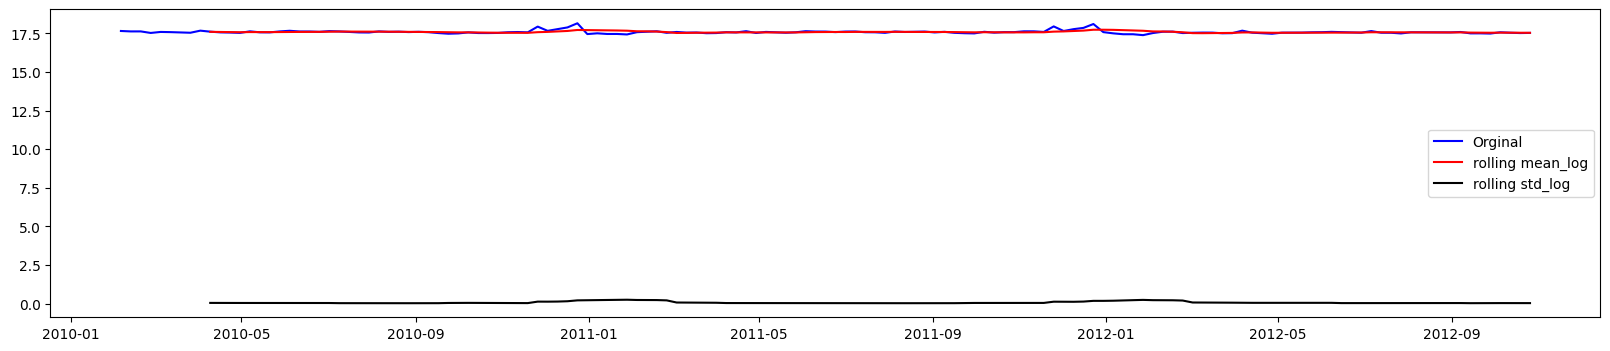

In [127]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [128]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [129]:
df_new.dropna(inplace = True)

In [130]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00


p-value: 9.14812402269068e-05


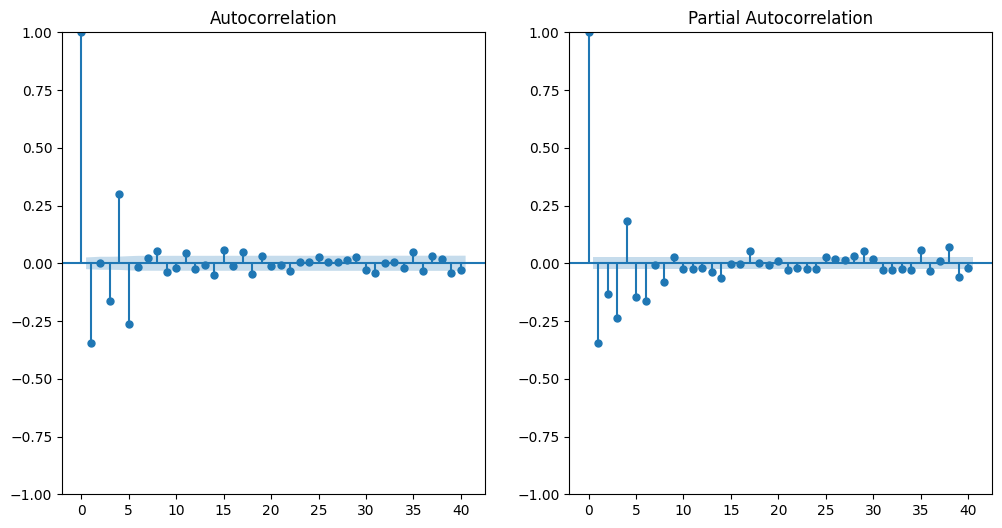

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=160339.296, Time=3.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=161545.399, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=160799.041, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=160570.811, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=161543.403, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=160515.371, Time=1.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=160488.947, Time=2.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=160006.617, Time=7.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=160160.149, Time=3.86 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=160168.407, Time=20.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=160005.786, Time=8.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=160054.613, Time=4.58 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=159895.809, Time=11.35 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=159854.731, Time=11.25 sec
 A

In [131]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from pmdarima import auto_arima

result = adfuller(walmart.copy['Weekly_Sales'])
print(f'p-value: {result[1]}')

# If p-value is greater than 0.05, data is non-stationary. Apply differencing.
data_diff = walmart.copy['Weekly_Sales'].diff().dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sm.graphics.tsa.plot_acf(data_diff, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(data_diff, lags=40, ax=ax[1])
plt.show()

# Fit ARIMA model using auto_arima (automated selection of p, d, q)
model = auto_arima(walmart.copy['Weekly_Sales'], seasonal=False, stepwise=True, trace=True)

# Check model summary
print(model.summary())



In [132]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(4,1,5))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

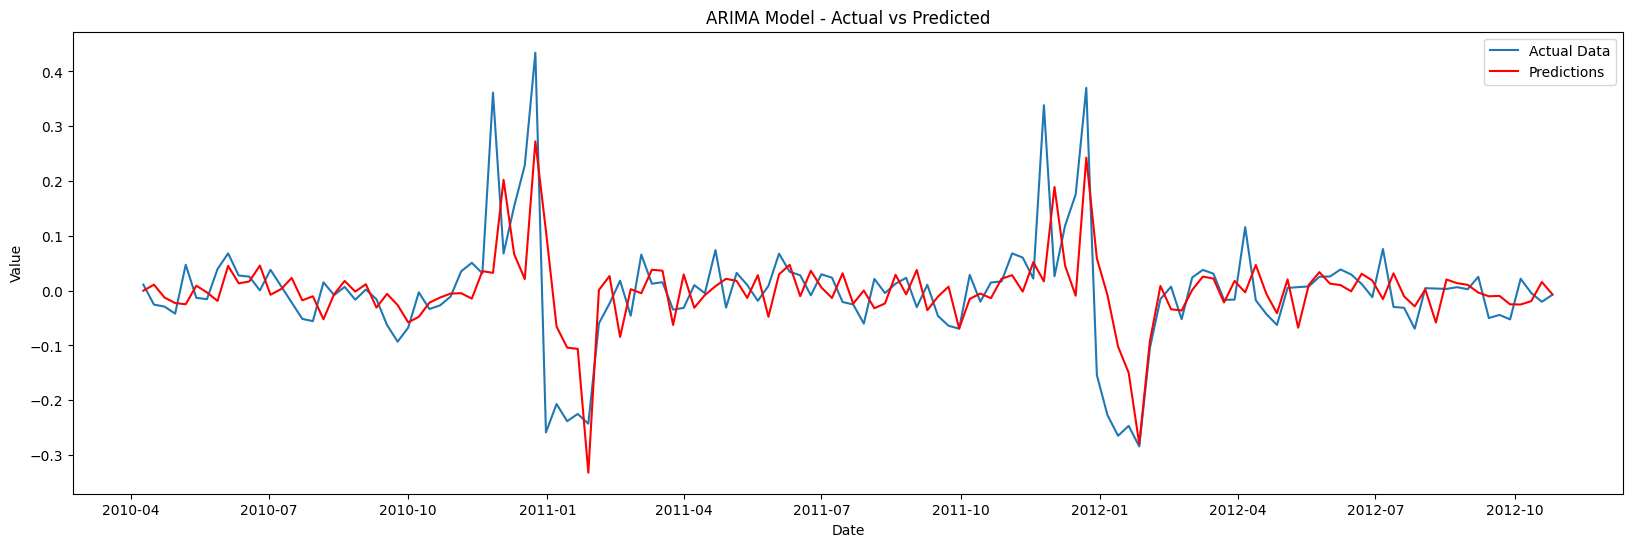

Mean Squared_Error  0.006721817997478892
Root Mean Squared_Error  0.08198669402701204


In [134]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

**2. Forecast the sales for each store for the next 12 weeks.¶**

**# Store 1**

How many stores would you like a future sales prediction for? Please enter......  3


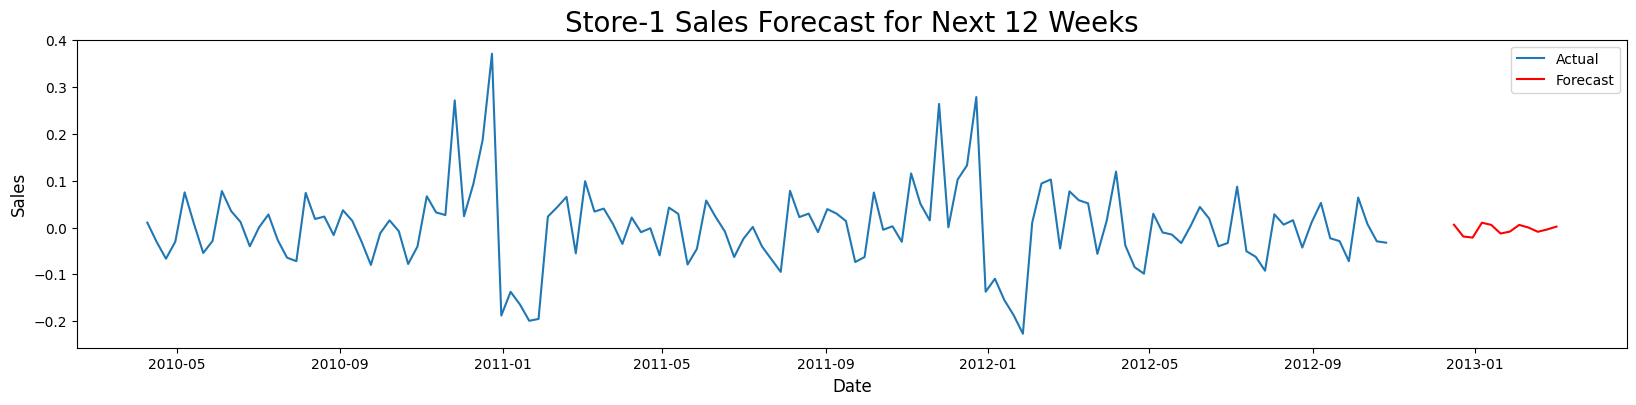

Mean Squared_Error  0.005946406778281193
Root Mean Squared_Error  0.07711294818823355


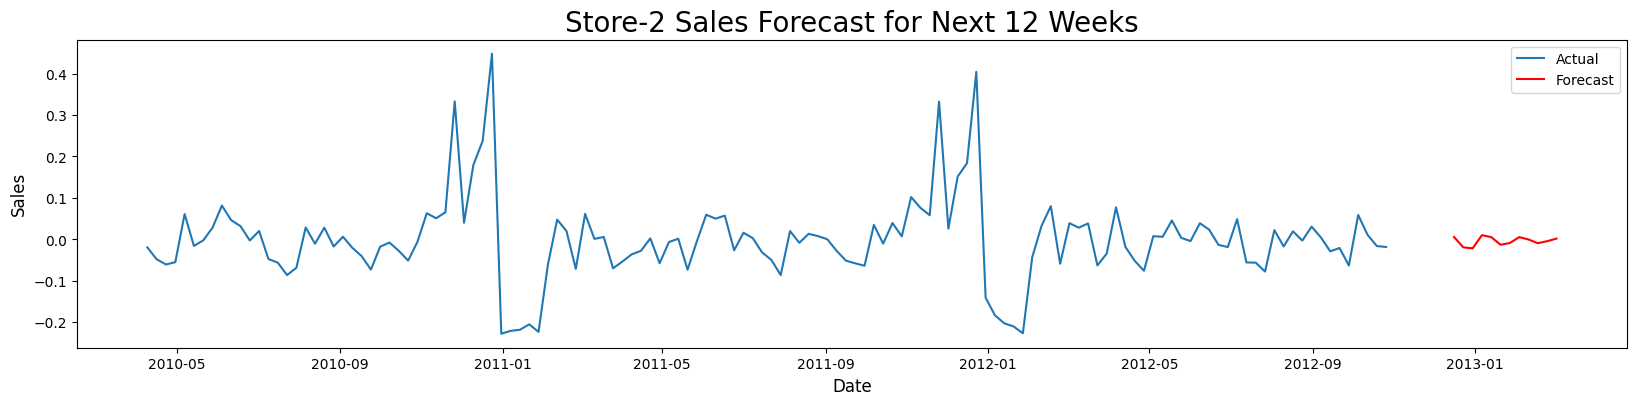

Mean Squared_Error  0.006820482359065714
Root Mean Squared_Error  0.08258621167643976


In [135]:
n=int(input('How many stores would you like a future sales prediction for? Please enter......  '))
for i in range(1,n):
    store_sales=walmart.copy[walmart.copy['Store']==i].groupby('Date')['Weekly_Sales'].sum().reset_index()
    store_sales.set_index('Date',inplace=True)
    forecast_steps = 12 # Forcasting the for the next 12 weeks
    forecast = arima_result.forecast(steps=forecast_steps)
    end_date_actual_data = '2012-12-10'
    # with the help of datetime function iam creating a time span of 12 weeks
    forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
    forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
    forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
    forecast_df.set_index('Date',inplace=True)
    df_log = np.log(store_sales)
    mean_log = df_log.rolling(window = 10).mean()
    df_new = df_log - mean_log
    df_new.dropna(inplace = True)
    plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
    plt.plot(df_new, label='Actual')
    plt.plot(forecast_df, label='Forecast', color='red')
    plt.title(f'Store-{i} Sales Forecast for Next 12 Weeks',fontsize=20)
    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Sales',fontsize=12)
    plt.legend()
    plt.show()
    mse=mean_squared_error(df_new,predictions)
    print(f'Mean Squared_Error  {mse}')
    rmse=np.sqrt(mse)
    print(f'Root Mean Squared_Error  {rmse}')